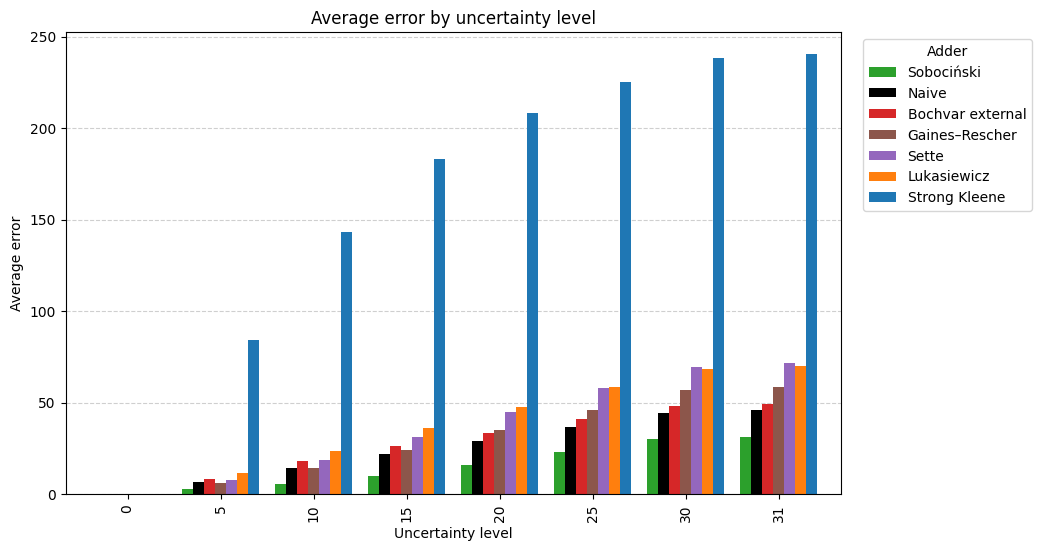

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# ---- load CSV ----
csv_path = "mnist_11_kernel.csv"
df = pd.read_csv(csv_path)

# ---- maps ----
name_map = {
    'Naive': 'Naive',
    'Sobo': 'Sobociński',
    'Bochvar': 'Bochvar external',
    'Gaines': 'Gaines–Rescher',
    'Sette': 'Sette',
    'SK': 'Strong Kleene',
    'Luka': 'Lukasiewicz'
}

style_map = {
    'Naive':   {'color': 'black',  'marker': 'o'},
    'Sobo':    {'color': 'tab:green',   'marker': '^'},
    'Bochvar': {'color': 'tab:red', 'marker': 'D'},   # fixed typo: "oredrange" -> "orange"
    'Gaines':  {'color': 'tab:brown',  'marker': '*'},
    'Sette':   {'color': 'tab:purple', 'marker': 'p'},
    'SK':      {'color': 'tab:blue',    'marker': 's'},   # changed to avoid duplicating Sobo's blue
    'Luka':    {'color': 'tab:orange',  'marker': 'h'}
}

# ---- columns ----
X_COL = "Uncertainty Level"
mean_cols = [c for c in df.columns if c.startswith("Avg Error")]

# Build means table: index=x, columns=adder short names
means = df.set_index(X_COL)[mean_cols].copy()
means.columns = [c.replace("Avg Error ", "") for c in means.columns]

# ---- ORDER BARS BY ASCENDING MEAN (globally; same order for each uncertainty level) ----
bar_order = means.mean(axis=0).sort_values(ascending=True).index.tolist()
means = means[bar_order]

# ---- colors in the same order ----
colors = [style_map[a]["color"] for a in means.columns]

# ---- plot ----
ax = means.plot(kind="bar", figsize=(10, 6), color=colors, width=.83)

ax.set_xlabel("Uncertainty level")
ax.set_ylabel("Average error")
ax.set_title("Average error by uncertainty level")

# ---- legend: replace labels with full names, keep legend in the SAME order as plotted ----
handles, labels = ax.get_legend_handles_labels()
labels_full = [name_map.get(lbl, lbl) for lbl in labels]

ax.legend(
    handles,
    labels_full,
    title="Adder",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)


ax.set_axisbelow(True)

ax.yaxis.grid(True, linestyle='--', alpha=0.6)



#plt.tight_layout()
plt.show()


In [16]:
print(df.columns)
print(df.head())

Index(['Uncertainty Level', 'Avg Error Naive', 'SD Error Naive',
       'Avg Error SK', 'SD Error SK', 'Avg Error Sobo', 'SD Error Sobo',
       'Avg Error Luka', 'SD Error Luka', 'Avg Error Bochvar',
       'SD Error Bochvar', 'Avg Error Sette', 'SD Error Sette',
       'Avg Error Gaines', 'SD Error Gaines'],
      dtype='object')
   Uncertainty Level  Avg Error Naive  SD Error Naive  Avg Error SK  \
0                  0         0.000000        0.000000      0.000000   
1                  5         8.269229        2.859198     52.795311   
2                 10        17.487185        6.081282     70.626826   
3                 15        26.667979        9.285939     89.494140   
4                 20        36.041384       12.573230    104.900954   

   SD Error SK  Avg Error Sobo  SD Error Sobo  Avg Error Luka  SD Error Luka  \
0     0.000000        0.000000       0.000000        0.000000       0.000000   
1    37.204544        2.910208       1.221440       10.732108       3.820537   